In [447]:
from pathlib import Path
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [448]:
legpath=Path("./legs")
headpath=Path(".head")
legs=[]
heads=[]

legs_dict=[]
heads_dict=[]

legs_dict_desc=[]
heads_dict_desc=[]

imagesToPredict=[]
imagesToPredictLabels=[]
        
def myLegsFunc():
    for leg in glob.glob("legs/*.jpg"):
        img = Image.open(str(leg))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '0']
        legs_dict_desc.append(0)
        legs_dict.append(np.array(convert_np))
        legs.append(csv_format_img)
        #plt.imshow(np.array(convert_np))
        #plt.show()


def myHeadsFunc():
    for head in glob.glob("head/*.jpg"):
        img = Image.open(str(head))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '1']
        heads_dict_desc.append(1)
        heads_dict.append(np.array(convert_np))
        heads.append(csv_format_img)
        #plt.imshow(np.array(convert_np))
        #plt.show()
        

def imagesToPredictFn():
    for head in glob.glob("head/toPredict/*.jpg"):
        img = Image.open(str(head))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '1']
        imagesToPredictLabels.append(1)
        imagesToPredict.append(np.array(convert_np))
        
        #plt.imshow(np.array(convert_np))
        #plt.show()
    
    
myHeadsFunc()
myLegsFunc()
imagesToPredictFn()


legs_head_dict=legs_dict+ heads_dict
legs_head_dict_desc=legs_dict_desc+ heads_dict_desc


X_train, X_test, y_train, y_test = train_test_split(legs_head_dict, legs_head_dict_desc, test_size=0.01, random_state=101, shuffle=True)


appData1=tuple(((np.array(X_train,dtype='uint8')),np.array(y_train,dtype='uint8')))
appData3=tuple(((np.array(X_test,dtype='uint8')),np.array(y_test,dtype='uint8')))


myAppData=((appData1),(appData3))

(train_images,train_labels),(test_images, test_labels)=myAppData
test_images= (np.array(imagesToPredict,dtype='uint8'))
test_labels= (np.array(imagesToPredictLabels,dtype='uint8'))
print(test_labels.dtype)
print("Length of train images is ",len(train_images))
class_names=["leg","head"]

uint8
Length of train images is  103


In [449]:

#print(np.array(train_images[7]))
test_labels

array([1, 1], dtype=uint8)

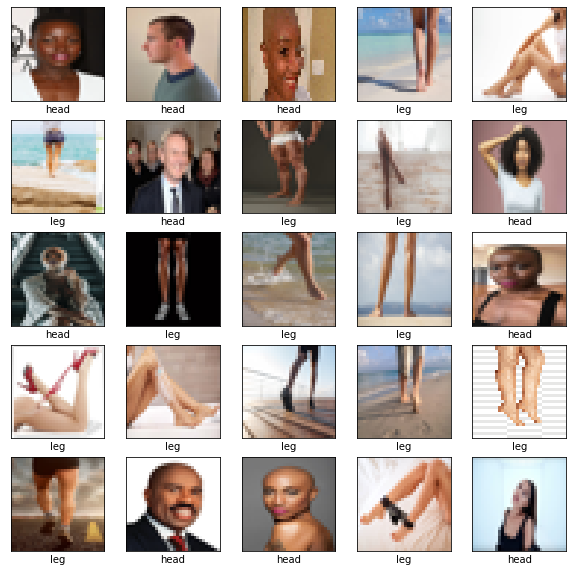

In [450]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], )
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [451]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [452]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [453]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [454]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_26 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)              

In [455]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50
4/4 [==============================] - 0s 63ms/step - loss: 14.3203 - accuracy: 0.5049 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 31ms/step - loss: 11.8251 - accuracy: 0.5146 - val_loss: 6.1876 - val_accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 34ms/step - loss: 1.7179 - accuracy: 0.6214 - val_loss: 0.0700 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 32ms/step - loss: 0.8400 - accuracy: 0.6893 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 29ms/step - loss: 0.5198 - accuracy: 0.7184 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 32ms/step - loss: 0.3087 - accuracy: 0.8738 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 32ms/step - loss: 0.2424 - accuracy: 0.8932 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 8/50
4/4 [=

1/1 - 0s - loss: 3.7431e-04 - accuracy: 1.0000


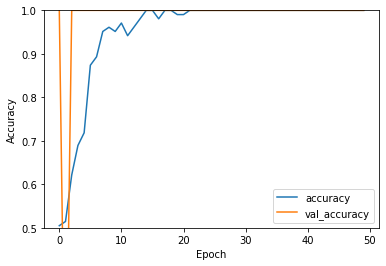

In [456]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [457]:
test_loss,test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Accuracy is ", test_acc)

1/1 - 0s - loss: 3.7431e-04 - accuracy: 1.0000
Accuracy is  1.0


In [458]:
prediction=model.predict(test_images)


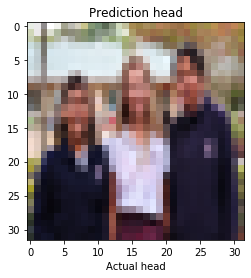

In [459]:

plt.grid(False)
plt.imshow(test_images[1])

plt.xlabel("Actual "+ class_names[test_labels[1]])
plt.title("Prediction "+ class_names[np.argmax(prediction[1])])
plt.show()




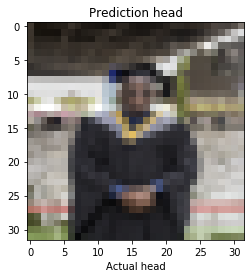

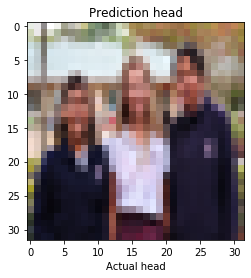

In [460]:
for i in range(len(test_images)):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual "+ class_names[test_labels[i]])
    plt.title("Prediction "+ class_names[np.argmax(prediction[i])])
    plt.show()